<a href="https://colab.research.google.com/github/MikeDeecode/Campus-placement-project/blob/master/school_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MBA STUDENTS PLACEMENT AT THE JAIN UNIVERSITY BANGALORE** 

# Exploratory Analysis and Machine Learning on the Campus Placement Data



*   Exploratory Data Analysis
*   Visualisation of analysed data 
*   Determining the characteristics affecting placement and salary
*   Using Decision Tree classifier to determine the Status of a student
*   Insights from the data

Ride along.







###**Description of the dataset**

The dataset used for this project contains the data of students from **Jain University Bangalore**

There are 215 rows and 15 columns in this dataset 

The columns contained in the dataset are as follows:


*   **sl_mo** - Serial number or index of the rows
*   **gender** - Sex of the students in the dataset
*   **ssc_p** - Secondary school percentage
*   **ssc_b** - Secondary school board
*   **hsc_p** - Higher secondary school percentage
*   **hsc_b** - Higher secondary school board
*   **hsc_s** - Higher secondary school specialisation
*   **degree_p** - Degree percentage
*   **degree_t** - Degree type
*   **workex** - Work experience
*   **etest_p** - Employability test percentage
*   **specialisation** - MBA specialisation
*   **mba_p** - MBA percentage
*   **status** - Student's status(Placed or Not placed)
*   **salary** - Salary expectation of students 


##**EXPLORATORY ANALYSIS (GETTINNG INSIGHTS AND DETERMINING FEATURES FROM THE DATA)**

Import the needed libraries to perform out analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

print("Setup complete")

Setup complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import the dataset

In [2]:
pment = pd.read_csv("/content/Placement_Data_(viz).csv", index_col = 0)
print ("Successful")

Successful


Obtaining a brief description of the datasets

In [0]:
pment.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
pment.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


The above data shows salary data in different percentiles 

In [0]:
pment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


OBSERVATION



*   The salary column has some missing values
*   Looking at the dataset again I observed that students who have not been placed do not have salarie as shown below
*   There are 67 missing values

In [7]:
salary_by_status = pment.groupby('status', as_index = False)['salary'].sum()
salary_by_status.rename(columns = {'salary': 'Total salary'}, inplace = True)
salary_by_status

,status,Total salary
0,Not Placed,0.0
1,Placed,42721000.0


## **EXPLORING DATA BY FEATURES**

###GENDER

**NUMBER OF MALE AND FEMALE STUDENTS**

In [8]:
pment['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

There are 138 male students and 76 female students 

**PERCENTAGE OF MALE AND FEMALE STUDENTS**

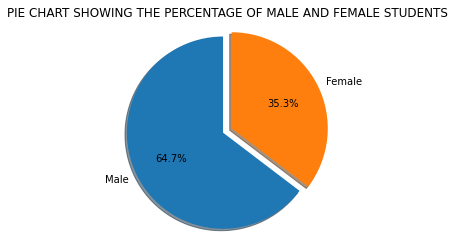

In [13]:
labels = 'Male', 'Female'
sizes = [139, 76]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
plt.title("PIE CHART SHOWING THE PERCENTAGE OF MALE AND FEMALE STUDENTS")
plt.show()



*   64.7% of the students are male 
*   35.3% of the students are female



In [0]:
print("NUMBERS BY STATUS")
pment['status'].value_counts()

NUMBERS BY STATUS


Placed        148
Not Placed     67
Name: status, dtype: int64

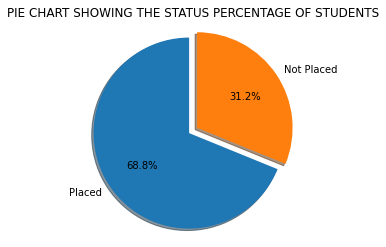

In [0]:
labels = 'Placed', 'Not Placed'
sizes = [148, 67]
explode = (0, 0.1)

fig1,ax2 = plt.subplots()
ax2.pie(sizes, labels = labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
ax2.axis('equal')
plt.title("PIE CHART SHOWING THE STATUS PERCENTAGE OF STUDENTS")
plt.show()

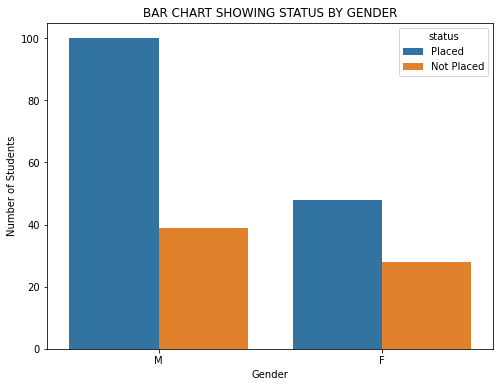

In [24]:
plt.figure(figsize =(8, 6))
sns.countplot('gender', hue = 'status', data = pment)
plt.title("BAR CHART SHOWING STATUS BY GENDER")
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

OBSERVATION

*   there are more men than women who are placed 
*   There are also more men than women who are not placed 
*   This seems normal because there are more men than women in the data set

**HOW GENDER AFFECTS SALARY**

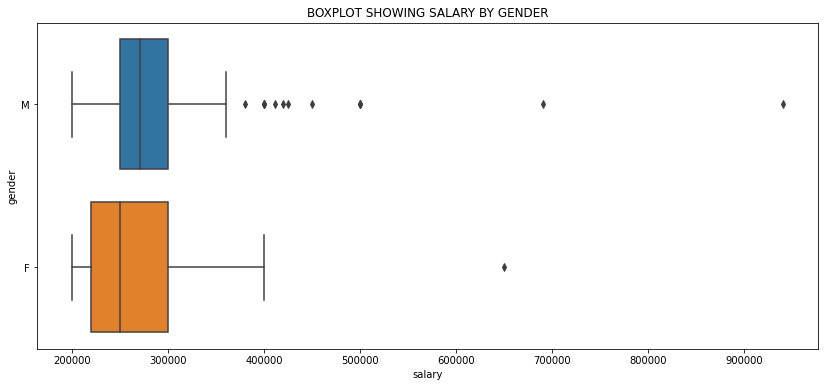

In [41]:
plt.figure(figsize = (14, 6))
sns.boxplot('salary', 'gender', data = pment)
plt.title("BOXPLOT SHOWING SALARY BY GENDER")
plt.show()

OBSERVATION

*   Generally, the male students earn higher than the female students 

CONCLUSION

* We can conclude that gender affects placement and salaty of the students

###SECONDARY EDUCATION PERCENTAGE (ssc_p) AND SECONDARY EDUCATION BOARD (ssc_b)



**NUMBER OF STUDENTS IN EACH SECONDARY EDUCATION BOARD**

In [31]:
pment['ssc_b'].value_counts()

Central    116
Others      99
Name: ssc_b, dtype: int64

* There are 116 students from the Central board 
* There are 99 students from other boards

**PERCENTAGE OF STUDENTS FROM EACH SECONDARY EDUCATION BOARD**

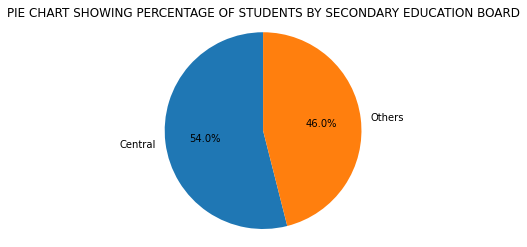

In [35]:
labels = 'Central', 'Others'
sizes  =[116, 99]

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 90)
ax2.axis('equal')
plt.title("PIE CHART SHOWING PERCENTAGE OF STUDENTS BY SECONDARY EDUCATION BOARD")
plt.show()

* 54% of the students are from the Central Secondary education board 
* 46% of the students are from Other secondary ediucation boards

**STATUS OF STUDENTS BY SECONDARY EDUCATION PERCENTAGE**

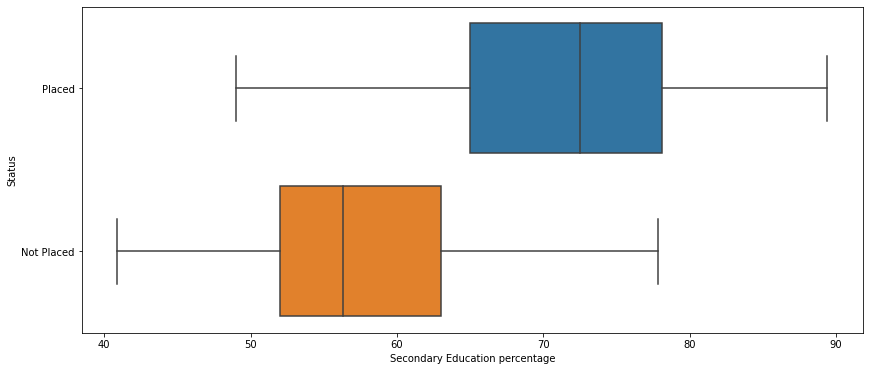

In [39]:
plt.figure(figsize = (14, 6))
sns.boxplot('ssc_p', 'status', data = pment)
plt.xlabel("Secondary Education percentage")
plt.ylabel("Status")
plt.title("BOX PLOT SHOWING STATUS BY SECONDARY SCHOOL PERCENTAGE")
plt.show()

* Students with higher Secondary education percentage get placed faster

**HOW SECONDARY EDUCATION BOARD AFFECTS STATUS**

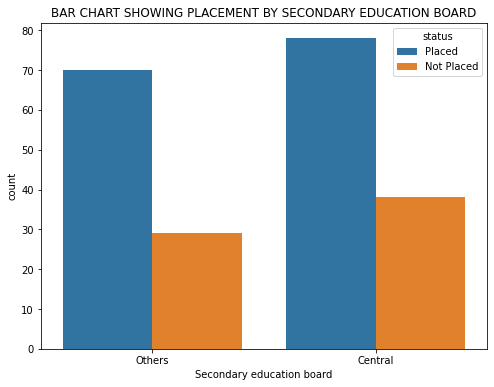

In [45]:
plt.figure(figsize = (8, 6))
sns.countplot('ssc_b', hue = 'status', data = pment)
plt.title("BAR CHART SHOWING PLACEMENT BY SECONDARY EDUCATION BOARD")
plt.xlabel("Secondary education board")
plt.show()

* Secondary education board dosent seem to have an effect on the placement of students 

**HOW SECNDARY EDUCATION PERCENTAGE AND BOARD AFFECTS SALARY**

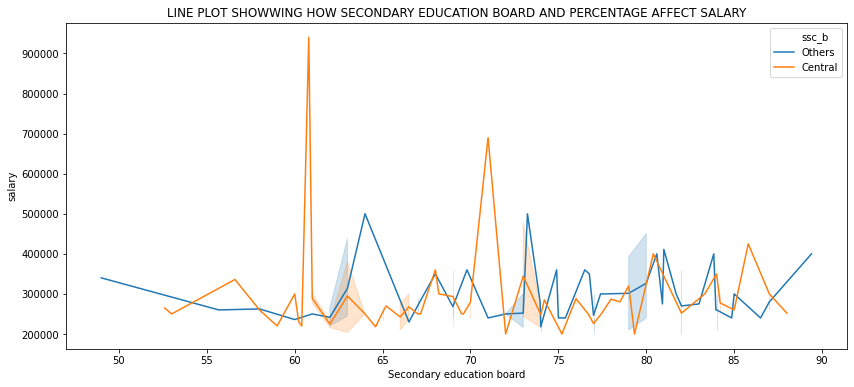

In [52]:
plt.figure(figsize = (14, 6))
sns.lineplot('ssc_p', 'salary', hue = 'ssc_b', data = pment)
plt.xlabel("Secondary education board")
plt.title("LINE PLOT SHOWWING HOW SECONDARY EDUCATION BOARD AND PERCENTAGE AFFECT SALARY")
plt.show()

* According to the plot, there is no relationship between secondary school board and salary but the students from Central board earn higher 
* There is also no relationship between secondary school percentage and salary but 

# **THANK YOU FOR VIEWING MY PROJECT!!!**